In [29]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


from sklearn.metrics import classification_report, confusion_matrix

# Importing model validation techniques
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')


In [9]:
df = pd.read_csv('telecom_cleaned.csv')

In [6]:
pd.set_option('display.max_columns', None)

In [10]:
## normalizing the rest of the data

columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = MinMaxScaler()
df[columns] = scaler.fit_transform(df[columns])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0.000000,0,0,1,0,1,0,0,0,0,0,1,2,0.115423,0.001275,0
1,1,0,0,0,0.464789,1,0,1,1,0,1,0,0,0,1,0,3,0.385075,0.215867,0
2,1,0,0,0,0.014085,1,0,1,1,1,0,0,0,0,0,1,3,0.354229,0.010310,1
3,1,0,0,0,0.619718,0,0,1,1,0,1,1,0,0,1,0,0,0.239303,0.210241,0
4,0,0,0,0,0.014085,1,0,2,0,0,0,0,0,0,0,1,2,0.521891,0.015330,1


In [5]:
x = df.drop('Churn', axis=1)
y = df['Churn']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33 , random_state=1)

In [11]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4711 entries, 5920 to 5157
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        4711 non-null   int64  
 1   gender            4711 non-null   int64  
 2   SeniorCitizen     4711 non-null   int64  
 3   Partner           4711 non-null   int64  
 4   Dependents        4711 non-null   int64  
 5   tenure            4711 non-null   float64
 6   PhoneService      4711 non-null   int64  
 7   MultipleLines     4711 non-null   int64  
 8   InternetService   4711 non-null   int64  
 9   OnlineSecurity    4711 non-null   int64  
 10  OnlineBackup      4711 non-null   int64  
 11  DeviceProtection  4711 non-null   int64  
 12  TechSupport       4711 non-null   int64  
 13  StreamingTV       4711 non-null   int64  
 14  StreamingMovies   4711 non-null   int64  
 15  Contract          4711 non-null   int64  
 16  PaperlessBilling  4711 non-null   int64  
 1

In [12]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 4711 entries, 5920 to 5157
Series name: Churn
Non-Null Count  Dtype
--------------  -----
4711 non-null   int64
dtypes: int64(1)
memory usage: 73.6 KB


In [13]:
y_test.info()

<class 'pandas.core.series.Series'>
Index: 2321 entries, 1773 to 16
Series name: Churn
Non-Null Count  Dtype
--------------  -----
2321 non-null   int64
dtypes: int64(1)
memory usage: 36.3 KB


1. Logistic regression

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1718
           1       0.60      0.57      0.59       603

    accuracy                           0.79      2321
   macro avg       0.73      0.72      0.72      2321
weighted avg       0.79      0.79      0.79      2321



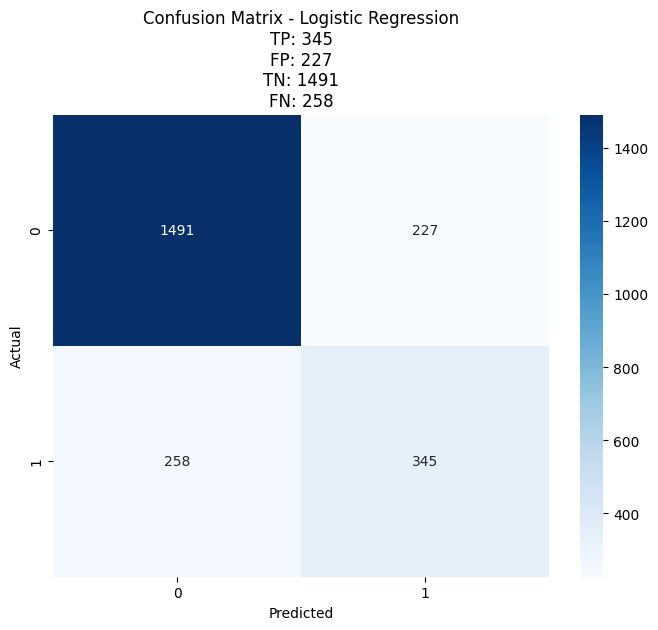

,Model,Train Accuracy,Test Accuracy,precision,Recall,f1-score
5,"LogisticRegression(C=30, random_state=1)",0.788155,0.791038,0.727817,0.720004,0.723672
3,"LogisticRegression(C=10, random_state=1)",0.794311,0.790607,0.727097,0.713794,0.719761
4,"LogisticRegression(C=20, random_state=1)",0.794948,0.790607,0.727093,0.712179,0.718780
1,"LogisticRegression(C=1, random_state=1)",0.801316,0.790607,0.727100,0.711103,0.718119
2,"LogisticRegression(C=5, random_state=1)",0.795160,0.789746,0.725911,0.708368,0.715954
0,"LogisticRegression(C=0.1, random_state=1)",0.796646,0.788453,0.724086,0.707495,0.714715


In [27]:
models_logreg = []

C_values = [0.1, 1, 5, 10, 20, 30]
C_values = [0.1, 1, 5, 10, 20, 30]


results = []
for C in C_values:
    logreg = LogisticRegression(C=C, random_state=1)
    logreg.fit(x_train, y_train)
    models_logreg.append(logreg)
    
    # Generate classification report for the model
    y_pred = logreg.predict(x_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy_train = logreg.score(x_train, y_train)
    accuracy_test = report['accuracy']
    recall = report['macro avg']['recall']
    f1_score = report['macro avg']['f1-score']
    precision = report['macro avg']['precision']
    results.append({'Model': logreg, 'Train Accuracy': accuracy_train, 'Test Accuracy': accuracy_test, 'precision': precision, 'Recall': recall, "f1-score":f1_score})

df_logreg = pd.DataFrame(results)
df_logreg_sorted = df_logreg.sort_values(by=['Recall', 'precision', 'f1-score','Test Accuracy', 'Train Accuracy'], ascending=False)
top_log = df_logreg_sorted[:1]

model_index = df_logreg_sorted['Recall'].idxmax()
log_best_model = models_logreg[model_index]
log_best_model.fit(x_train, y_train)
y_log = log_best_model.predict(x_test)
print(classification_report(y_test, y_log))

cm_log = confusion_matrix(y_test, y_log)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues')
tp = cm_log[1, 1]
fp = cm_log[0, 1]
tn = cm_log[0, 0]
fn = cm_log[1, 0]

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression\nTP: {}\nFP: {}\nTN: {}\nFN: {}'.format(tp, fp, tn, fn))
plt.show()

df_logreg_sorted[:10]

2. Decision Tree

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1718
           1       0.60      0.57      0.59       603

    accuracy                           0.79      2321
   macro avg       0.73      0.72      0.72      2321
weighted avg       0.79      0.79      0.79      2321



,Model,Train Accuracy,Test Accuracy,precision,Recall,f1-score
161,"DecisionTreeClassifier(max_depth=5, max_leaf_n...",0.795373,0.783714,0.721023,0.732816,0.726304
162,"DecisionTreeClassifier(max_depth=5, max_leaf_n...",0.795373,0.783714,0.721023,0.732816,0.726304
165,"DecisionTreeClassifier(max_depth=5, max_leaf_n...",0.795373,0.783714,0.721023,0.732816,0.726304
166,"DecisionTreeClassifier(max_depth=5, max_leaf_n...",0.795373,0.783714,0.721023,0.732816,0.726304
169,"DecisionTreeClassifier(max_depth=5, max_leaf_n...",0.795373,0.783714,0.721023,0.732816,0.726304


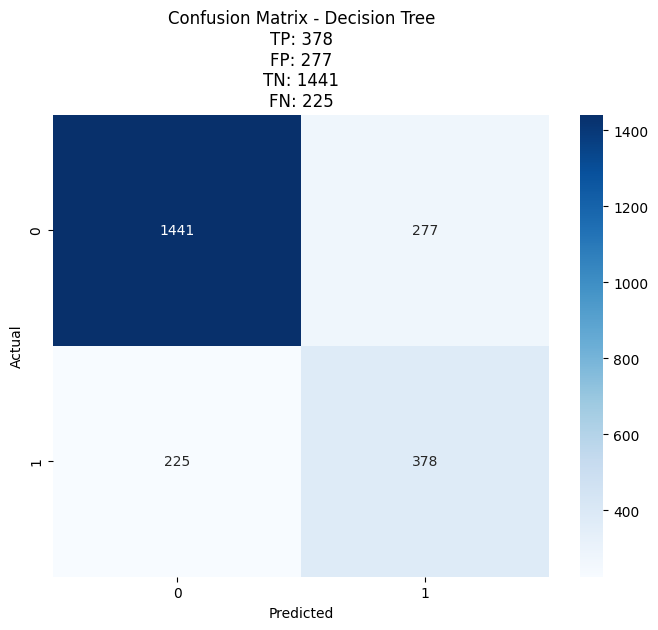

In [30]:
models_DT = []
results = []

# Defining Parameters
max_depths = [3, 4, 5, 6, 7]
max_features = ['sqrt', 'log2', None]
min_samples_leafs = [1, 2, 3, 5, 10]
max_leaf_nodes = [5, 10, 15, 20]

for max_depth in max_depths:
    for max_feature in max_features:
        for min_samples_leaf in min_samples_leafs:
            for max_leaf_node in max_leaf_nodes:
                DT = DecisionTreeClassifier(criterion='gini', max_depth=max_depth,
                                               max_features=max_feature, min_samples_leaf=min_samples_leaf,
                                               max_leaf_nodes=max_leaf_node, random_state=1)
                DT.fit(x_train, y_train)
                models_DT.append(DT)
                
                y_pred = DT.predict(x_test)
                report = classification_report(y_test, y_pred, output_dict=True)
                accuracy_train = DT.score(x_train, y_train)
                accuracy_test = report['accuracy']
                recall = report['macro avg']['recall']
                f1_score = report['macro avg']['f1-score']
                precision = report['macro avg']['precision']
                results.append({'Model': DT, 'Train Accuracy': accuracy_train, 'Test Accuracy': accuracy_test, 'precision': precision, 'Recall': recall, "f1-score":f1_score })

df_DT = pd.DataFrame(results)
df_DT_sorted = df_DT.sort_values(by=['Recall', 'precision', 'f1-score','Test Accuracy', 'Train Accuracy'], ascending=False)
top_DT = df_DT_sorted[:1]

model_index = df_DT_sorted['Recall'].idxmax()
DT_best = models_DT[model_index]
DT_best.fit(x_train, y_train)
y_dt = DT_best.predict(x_test)
print(classification_report(y_test, y_log))

cm_DT = confusion_matrix(y_test, y_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_DT, annot=True, fmt='d', cmap='Blues')
tp = cm_DT[1, 1]
fp = cm_DT[0, 1]
tn = cm_DT[0, 0]
fn = cm_DT[1, 0]

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree\nTP: {}\nFP: {}\nTN: {}\nFN: {}'.format(tp, fp, tn, fn))

df_DT_sorted[:5]

3. Random Forest Classifier

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1718
           1       0.65      0.52      0.58       603

    accuracy                           0.80      2321
   macro avg       0.75      0.71      0.72      2321
weighted avg       0.79      0.80      0.80      2321



,Model,Train Accuracy,Test Accuracy,precision,Recall,f1-score
6,"RandomForestClassifier(max_depth=10, n_estimat...",0.898960,0.802671,0.746434,0.711180,0.724736
7,"RandomForestClassifier(max_depth=10, max_featu...",0.898960,0.802671,0.746434,0.711180,0.724736
46,"RandomForestClassifier(max_depth=10, min_sampl...",0.874973,0.803533,0.749180,0.706918,0.722358
47,"RandomForestClassifier(max_depth=10, max_featu...",0.874973,0.803533,0.749180,0.706918,0.722358
44,"RandomForestClassifier(max_depth=10, min_sampl...",0.886224,0.803964,0.750271,0.706133,0.722050


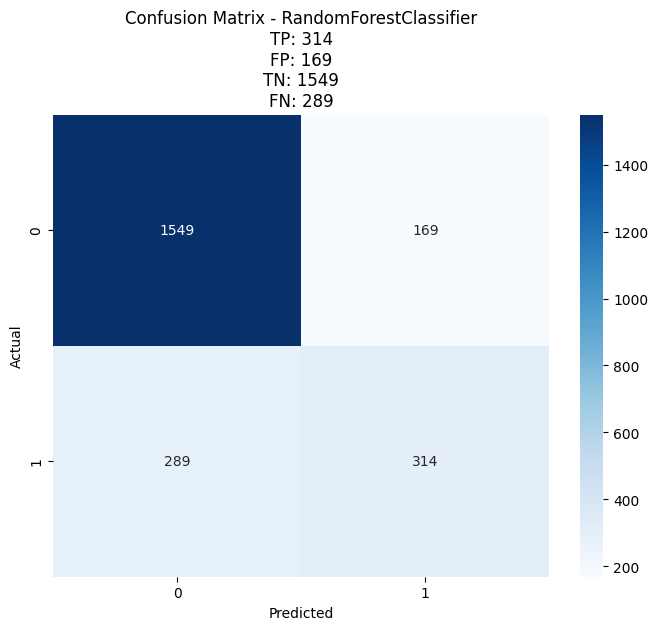

In [31]:
models_RF = []
results = []

# Define parameters
n_estimators = [50, 100, 150]
max_depths = [5, 10, 15]
min_samples_leafs = [1, 2, 3]
max_features = ['sqrt', 'log2']

for n_estimator in n_estimators:
    for max_depth in max_depths:
        for min_samples_leaf in min_samples_leafs:
            for max_feature in max_features:
                RF = RandomForestClassifier(n_estimators=n_estimator, max_depth=max_depth,
                                            min_samples_leaf=min_samples_leaf, max_features=max_feature,
                                            random_state=1)
                RF.fit(x_train, y_train)
                models_RF.append(RF)
                
                # Generate classification report for the model
                y_pred = RF.predict(x_test)
                report = classification_report(y_test, y_pred, output_dict=True)
                accuracy_train = RF.score(x_train, y_train)
                accuracy_test = report['accuracy']
                recall = report['macro avg']['recall']
                f1_score = report['macro avg']['f1-score']
                precision = report['macro avg']['precision']
                results.append({'Model': str(RF),'Train Accuracy': accuracy_train, 'Test Accuracy': accuracy_test, 'precision': precision, 'Recall': recall, "f1-score":f1_score})

df_RF = pd.DataFrame(results)
df_RF_sorted = df_RF.sort_values(by=['Recall', 'precision', 'f1-score','Test Accuracy', 'Train Accuracy'], ascending=False)
top_RF = df_RF_sorted[:1]

model_index = df_RF_sorted['Recall'].idxmax()
RFC_best_model = models_RF[model_index]
RFC_best_model.fit(x_train, y_train)
y_rfc = RFC_best_model.predict(x_test)
print(classification_report(y_test, y_rfc))

cm_RFC = confusion_matrix(y_test, y_rfc)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_RFC, annot=True, fmt='d', cmap='Blues')

tp = cm_RFC[1, 1]
fp = cm_RFC[0, 1]
tn = cm_RFC[0, 0]
fn = cm_RFC[1, 0]

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - RandomForestClassifier\nTP: {}\nFP: {}\nTN: {}\nFN: {}'.format(tp, fp, tn, fn))
           
df_RF_sorted[:5]

4. Ada Boost

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1718
           1       0.65      0.54      0.59       603

    accuracy                           0.81      2321
   macro avg       0.75      0.72      0.73      2321
weighted avg       0.80      0.81      0.80      2321



,Model,Train Accuracy,Test Accuracy,precision,Recall,f1-score
2,"AdaBoostClassifier(learning_rate=0.5, random_s...",0.808321,0.805687,0.750057,0.719137,0.731504
7,"AdaBoostClassifier(n_estimators=100, random_st...",0.814477,0.801810,0.743718,0.717594,0.728344
6,"AdaBoostClassifier(learning_rate=0.5, n_estima...",0.814689,0.801379,0.743213,0.716226,0.727250
10,"AdaBoostClassifier(learning_rate=0.5, n_estima...",0.814477,0.801810,0.743975,0.715979,0.727337
5,"AdaBoostClassifier(learning_rate=0.33, n_estim...",0.810656,0.802240,0.744748,0.715732,0.727422


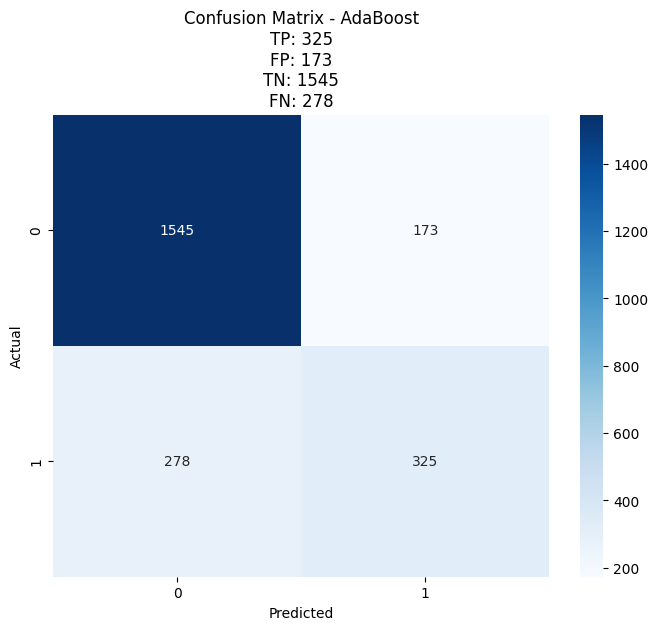

In [32]:
models_ada = []
results = []


n_estimators = [50, 100, 200, 500, 1000]
learning_rates = [0.1,0.33, 0.5, 1.0]

for n_estimator in n_estimators:
    for learning_rate in learning_rates:
        ada = AdaBoostClassifier(n_estimators=n_estimator, learning_rate=learning_rate, random_state=1)
        ada.fit(x_train, y_train)
        models_ada.append(ada)
        
        # Generate classification report for the model
        y_pred = ada.predict(x_test)
        report = classification_report(y_test, y_pred, output_dict=True)
        accuracy_train = ada.score(x_train, y_train)
        accuracy_test = report['accuracy']
        recall = report['macro avg']['recall']
        f1_score = report['macro avg']['f1-score']
        precision = report['macro avg']['precision']
        results.append({'Model': str(ada),'Train Accuracy': accuracy_train, 'Test Accuracy': accuracy_test, 'precision': precision, 'Recall': recall, "f1-score":f1_score})

df_ada = pd.DataFrame(results)
df_ada_sorted = df_ada.sort_values(by=['Recall', 'precision', 'f1-score','Test Accuracy', 'Train Accuracy'], ascending=False)
top_ada = df_ada_sorted[:1]

model_index = df_ada_sorted['Recall'].idxmax()
ada_best_model = models_ada[model_index]
ada_best_model.fit(x_train, y_train)
y_ada = ada_best_model.predict(x_test)
print(classification_report(y_test, y_ada))

cm_ada = confusion_matrix(y_test, y_ada)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ada, annot=True, fmt='d', cmap='Blues')

tp = cm_ada[1, 1]
fp = cm_ada[0, 1]
tn = cm_ada[0, 0]
fn = cm_ada[1, 0]

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - AdaBoost\nTP: {}\nFP: {}\nTN: {}\nFN: {}'.format(tp, fp, tn, fn))

df_ada_sorted[:5]

5. Gradient Boost

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1718
           1       0.63      0.51      0.57       603

    accuracy                           0.80      2321
   macro avg       0.74      0.70      0.72      2321
weighted avg       0.79      0.80      0.79      2321



,Model,Train Accuracy,Test Accuracy,precision,Recall,f1-score
0,GradientBoostingClassifier(random_state=1),0.835491,0.796209,0.736316,0.704662,0.716985
1,"GradientBoostingClassifier(max_depth=5, random...",0.835491,0.792762,0.730662,0.704486,0.715066
27,"GradientBoostingClassifier(learning_rate=0.5, ...",0.835491,0.793193,0.731753,0.701010,0.712978
16,"GradientBoostingClassifier(n_estimators=250, r...",0.835491,0.791900,0.729662,0.700675,0.712092
2,"GradientBoostingClassifier(max_depth=7, random...",0.835491,0.789746,0.726259,0.700296,0.710740


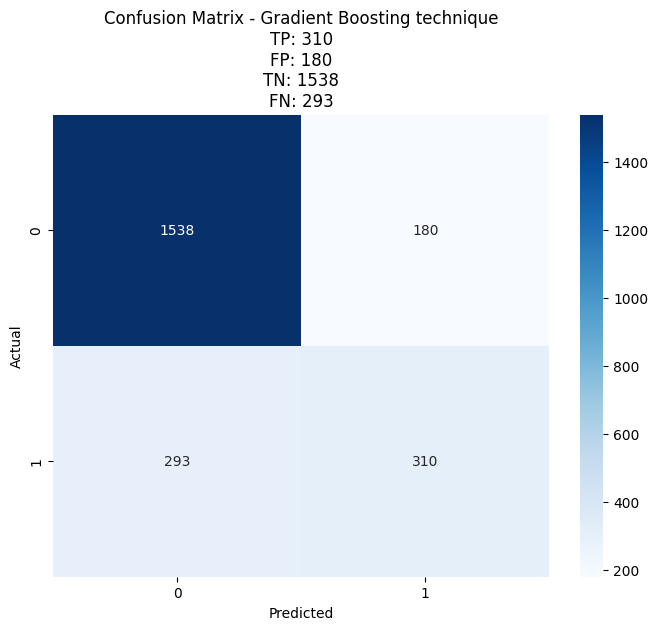

In [33]:
GB_model = []
result_gb = []


# Define parameters
n_estimators = [100,250, 500]
learning_rates = [0.1, 0.33, 0.5, 1.0]
max_depths = [3,  5, 7, 9]

for n_estimator in n_estimators:
    for learning_rate in learning_rates:
        for max_depth in max_depths:
            GB = GradientBoostingClassifier(n_estimators=n_estimator, learning_rate=learning_rate, max_depth=max_depth, random_state=1)
            GB.fit(x_train, y_train)
            GB_model.append(GB)

            y_pred = GB.predict(x_test)
            report = classification_report(y_test, y_pred, output_dict=True)
            accuracy_test = GB.score(x_train, y_train)
            accuracy_test = report['accuracy']
            recall = report['macro avg']['recall']
            f1_score = report['macro avg']['f1-score']
            precision = report['macro avg']['precision']
            result_gb.append({'Model':str(GB), 'Train Accuracy': accuracy_train, 'Test Accuracy': accuracy_test, 'precision': precision, 'Recall': recall, "f1-score":f1_score})

df_GB = pd.DataFrame(result_gb)
df_GB_sorted = df_GB.sort_values(by=['Recall', 'precision', 'f1-score','Test Accuracy', 'Train Accuracy'], ascending=False)
top_GB = df_GB_sorted[:1]

model_index = df_GB_sorted['Recall'].idxmax()
GB_model_model = GB_model[model_index]
GB_model_model.fit(x_train, y_train)
y_gb = GB_model_model.predict(x_test)
print(classification_report(y_test, y_gb))

cm_GB = confusion_matrix(y_test, y_gb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_GB, annot=True, fmt='d', cmap='Blues')

tp = cm_GB[1, 1]
fp = cm_GB[0, 1]
tn = cm_GB[0, 0]
fn = cm_GB[1, 0]

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Gradient Boosting technique\nTP: {}\nFP: {}\nTN: {}\nFN: {}'.format(tp, fp, tn, fn))
      
df_GB_sorted[:5]

6. XG Boost

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1718
           1       0.64      0.52      0.57       603

    accuracy                           0.80      2321
   macro avg       0.74      0.71      0.72      2321
weighted avg       0.79      0.80      0.79      2321



,Model,Train Accuracy,Test Accuracy,precision,Recall,f1-score
0,"XGBClassifier(base_score=None, booster=None, c...",0.835491,0.799224,0.740892,0.708313,0.720996
20,"XGBClassifier(base_score=None, booster=None, c...",0.835491,0.792762,0.731073,0.700719,0.712562
5,"XGBClassifier(base_score=None, booster=None, c...",0.835491,0.791038,0.728275,0.700631,0.711623
21,"XGBClassifier(base_score=None, booster=None, c...",0.835491,0.788884,0.725069,0.698100,0.708832
41,"XGBClassifier(base_score=None, booster=None, c...",0.835491,0.787161,0.722411,0.698012,0.707906


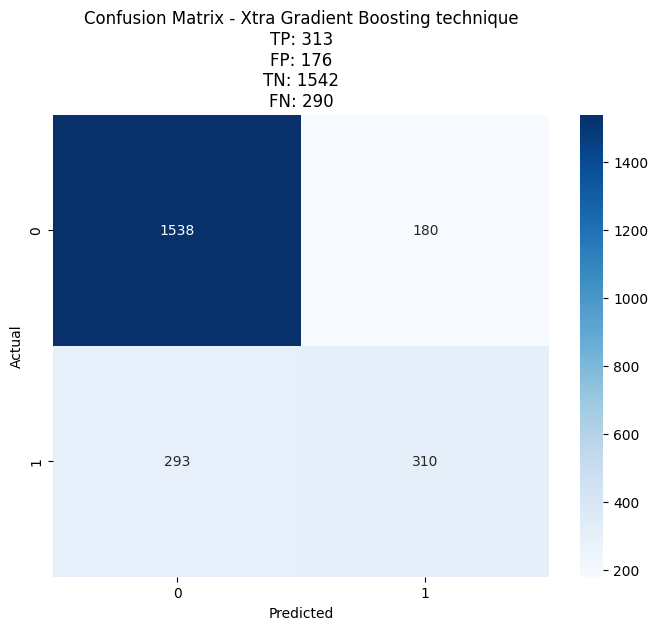

In [34]:
XGB_model = []
results = []

# Define parameters
n_estimators = [100, 250, 500, 1000]
learning_rates = [0.1, 0.33, 0.5, 1.0]
max_depths = [3, 5, 7, 9, 12]

for n_estimator in n_estimators:
    for learning_rate in learning_rates:
        for max_depth in max_depths:
            XGB = XGBClassifier(n_estimators=n_estimator, learning_rate=learning_rate, max_depth=max_depth, random_state=1)
            XGB.fit(x_train, y_train)
            XGB_model.append(XGB)

            y_pred = XGB.predict(x_test)
            report = classification_report(y_test, y_pred, output_dict=True)
            accuracy_test = XGB.score(x_test, y_test) 
            accuracy_test = report['accuracy']
            recall = report['macro avg']['recall']
            f1_score = report['macro avg']['f1-score']
            precision = report['macro avg']['precision']
            results.append({'Model':XGB, 'Train Accuracy': accuracy_train, 'Test Accuracy': accuracy_test, 'precision': precision, 'Recall': recall, "f1-score":f1_score})

df_XGB = pd.DataFrame(results)

df_XGB_sorted = df_XGB.sort_values(by=['Recall', 'precision', 'f1-score','Test Accuracy', 'Train Accuracy'], ascending=False)
top_XGB = df_XGB_sorted[:1]

XGB_best_model = XGB_model[model_index]
XGB_best_model.fit(x_train, y_train)
y_xgb = XGB_best_model.predict(x_test)
print(classification_report(y_test, y_xgb))

cm_XGB = confusion_matrix(y_test, y_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_GB, annot=True, fmt='d', cmap='Blues')
tp = cm_XGB[1, 1]
fp = cm_XGB[0, 1]
tn = cm_XGB[0, 0]
fn = cm_XGB[1, 0]

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Xtra Gradient Boosting technique\nTP: {}\nFP: {}\nTN: {}\nFN: {}'.format(tp, fp, tn, fn))
    
df_XGB_sorted[:5]

7. KNN

              precision    recall  f1-score   support

           0       0.75      0.83      0.79      1718
           1       0.31      0.22      0.26       603

    accuracy                           0.67      2321
   macro avg       0.53      0.52      0.52      2321
weighted avg       0.64      0.67      0.65      2321



,Model,Train Accuracy,Test Accuracy,precision,Recall,f1-score
1,"KNeighborsClassifier(n_neighbors=3, weights='d...",1.000000,0.669539,0.531524,0.524921,0.523803
0,KNeighborsClassifier(n_neighbors=3),0.816387,0.669970,0.530804,0.524135,0.522782
3,KNeighborsClassifier(weights='distance'),1.000000,0.693667,0.530082,0.517002,0.506235
5,"KNeighborsClassifier(n_neighbors=7, weights='d...",1.000000,0.705730,0.526302,0.511159,0.489774
2,KNeighborsClassifier(),0.767353,0.693667,0.517380,0.508929,0.493085


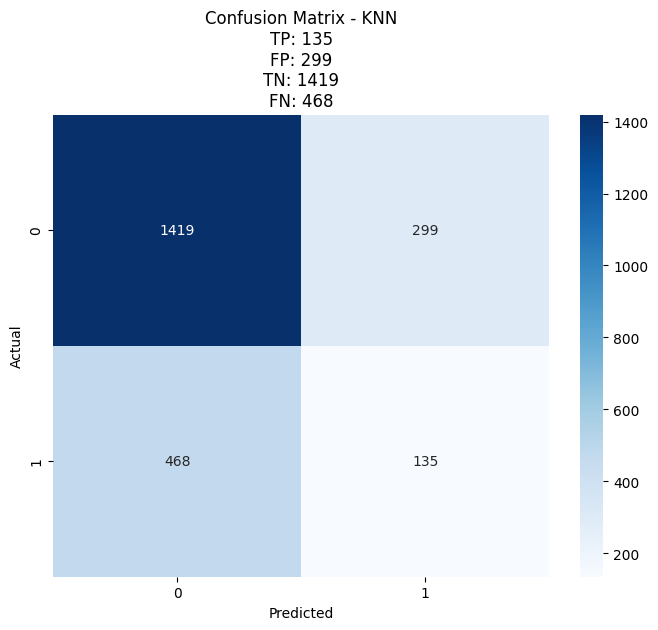

In [35]:
KNN_model = []
results = []

# Define parameters
n_neighbors = [3, 5, 7, 9]
weights = ['uniform', 'distance']

# Create and train the KNN models
for n_neighbor in n_neighbors:
    for weight in weights:
        KNN = KNeighborsClassifier(n_neighbors=n_neighbor, weights=weight)
        KNN.fit(x_train, y_train)
        KNN_model.append(KNN)

        y_pred = KNN.predict(x_test)
        report = classification_report(y_test, y_pred, output_dict=True)
        accuracy_train = KNN.score(x_train,y_train)
        accuracy_test = report['accuracy']
        recall = report['macro avg']['recall']
        f1_score = report['macro avg']['f1-score']
        precision = report['macro avg']['precision']
        results.append({'Model': KNN,'Train Accuracy': accuracy_train, 'Test Accuracy': accuracy_test, 'precision': precision, 'Recall': recall, "f1-score":f1_score})

df_KNN = pd.DataFrame(results)
df_KNN_sorted = df_KNN.sort_values(by=['Recall', 'precision', 'f1-score','Test Accuracy', 'Train Accuracy'], ascending=False)
top_KNN = df_KNN_sorted[:1]

model_index = df_KNN_sorted['Recall'].idxmax()
KNN_best_model = KNN_model[model_index]
KNN_best_model.fit(x_train, y_train)
y_knn = KNN_best_model.predict(x_test)
print(classification_report(y_test,y_knn))

cm_knn = confusion_matrix(y_test, y_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')

tp = cm_knn[1, 1]
fp = cm_knn[0, 1]
tn = cm_knn[0, 0]
fn = cm_knn[1, 0]

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN\nTP: {}\nFP: {}\nTN: {}\nFN: {}'.format(tp, fp, tn, fn))

df_KNN_sorted[:5]

8. SVM

              precision    recall  f1-score   support

           0       0.79      0.93      0.85      1718
           1       0.60      0.30      0.40       603

    accuracy                           0.77      2321
   macro avg       0.70      0.61      0.63      2321
weighted avg       0.74      0.77      0.74      2321



,Model,Train Accuracy,Test Accuracy,precision,Recall,f1-score
0,"SVC(C=0.1, kernel='linear', random_state=1)",0.763744,0.766049,0.695541,0.613791,0.626094
4,"SVC(C=10, kernel='linear', random_state=1)",0.762259,0.762602,0.686888,0.613077,0.624987
2,"SVC(C=1, kernel='linear', random_state=1)",0.760348,0.764326,0.692610,0.608860,0.620128
6,"SVC(C=100, kernel='linear', random_state=1)",0.758650,0.764326,0.694109,0.605093,0.615499
8,"SVC(C=500, kernel='linear', random_state=1)",0.759711,0.762171,0.688085,0.604714,0.615005


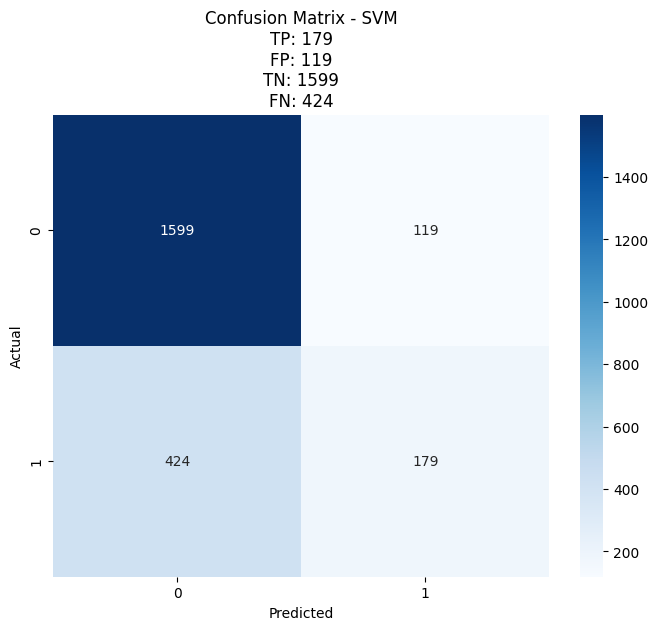

In [36]:
SVM_model = []
results = []

# Define parameters
C_values = [0.1, 1, 10, 100, 500, 1000]
kernels = ['linear', 'rbf']

# Create and train the SVM models
for C_value in C_values:
    for kernel in kernels:
        SVM = SVC(C=C_value, kernel=kernel, random_state=1)
        SVM.fit(x_train, y_train)
        SVM_model.append(SVM)

        y_pred = SVM.predict(x_test)
        report = classification_report(y_test, y_pred, output_dict=True)
        accuracy_train = SVM.score(x_train, y_train)
        accuracy_test = report['accuracy']
        recall = report['macro avg']['recall']
        f1_score = report['macro avg']['f1-score']
        precision = report['macro avg']['precision']
        results.append({'Model': str(SVM),'Train Accuracy': accuracy_train, 'Test Accuracy': accuracy_test, 'precision': precision, 'Recall': recall, "f1-score":f1_score})

df_SVM = pd.DataFrame(results)
df_SVM_sorted = df_SVM.sort_values(by=['Recall', 'precision', 'f1-score','Test Accuracy', 'Train Accuracy'], ascending=False)
top_SVM = df_SVM_sorted[:1]

model_index = df_SVM_sorted['Recall'].idxmax()
SVM_best_model = SVM_model[model_index]
SVM_best_model.fit(x_train, y_train)
y_svm = SVM_best_model.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_svm))

cm_svm = confusion_matrix(y_test, y_svm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')

tp = cm_svm[1, 1]
fp = cm_svm[0, 1]
tn = cm_svm[0, 0]
fn = cm_svm[1, 0]

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM\nTP: {}\nFP: {}\nTN: {}\nFN: {}'.format(tp, fp, tn, fn))

df_SVM_sorted[:5]

In [37]:
dataframes = [top_log, top_DT, top_RF, top_ada, top_XGB, top_GB, top_KNN, top_SVM]
model_names = ['Logistic Regression','Decision Tree','Random Forest', 'Ada Boost', 'XG Boost' , 'Gradient Boost',  'KNN', 'SVM'  ]
df_combined = pd.concat(dataframes)
df_combined['Model'] = model_names
df_combined

,Model,Train Accuracy,Test Accuracy,precision,Recall,f1-score
5,Logistic Regression,0.788155,0.791038,0.727817,0.720004,0.723672
161,Decision Tree,0.795373,0.783714,0.721023,0.732816,0.726304
6,Random Forest,0.898960,0.802671,0.746434,0.711180,0.724736
2,Ada Boost,0.808321,0.805687,0.750057,0.719137,0.731504
0,XG Boost,0.835491,0.799224,0.740892,0.708313,0.720996
0,Gradient Boost,0.835491,0.796209,0.736316,0.704662,0.716985
1,KNN,1.000000,0.669539,0.531524,0.524921,0.523803
0,SVM,0.763744,0.766049,0.695541,0.613791,0.626094


In [38]:
# Sorting by the best recall rate, precision, f1-score and then by test accuracy and next by train accuracy
# index is kept same to pull the model number straight

df_sorted = df_combined.sort_values(by=['Recall', 'precision', 'f1-score','Test Accuracy', 'Train Accuracy'], ascending=False)
df_sorted

,Model,Train Accuracy,Test Accuracy,precision,Recall,f1-score
161,Decision Tree,0.795373,0.783714,0.721023,0.732816,0.726304
5,Logistic Regression,0.788155,0.791038,0.727817,0.720004,0.723672
2,Ada Boost,0.808321,0.805687,0.750057,0.719137,0.731504
6,Random Forest,0.898960,0.802671,0.746434,0.711180,0.724736
0,XG Boost,0.835491,0.799224,0.740892,0.708313,0.720996
0,Gradient Boost,0.835491,0.796209,0.736316,0.704662,0.716985
0,SVM,0.763744,0.766049,0.695541,0.613791,0.626094
1,KNN,1.000000,0.669539,0.531524,0.524921,0.523803
